<a href="https://colab.research.google.com/github/mukiliderrick/predicting_number-of-indivisuals_likely_to_own_or_use_abank_account/blob/master/moringa_data_science_core_core_w3_independent__project_2020_03_Derrick_Mukili_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESEARCH QUESTION 

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

.1.Find out individuals who are more likely to own a bank account
2. find the key attributes that make an individual own a bank account


# Univariate Analysis with Python 

## 1.0 Importing Libraries

In [0]:
# Importing Pandas
# 
import pandas as pd
# Importing Numpy
#
import numpy as np
# Importing Seaborn
#
import seaborn as sns
# Importing Matplotlib
#
import matplotlib.pyplot as plt

#loading our Data

In [386]:
#loading our dataset
#thenviewing the first five rows at the top
financial = pd.read_csv('/content/Financial Dataset - 1 (1).csv')
financial.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## viewing our data

In [387]:
#checking the number of records our data has
financial.shape

(23524, 13)

In [388]:
#checking if our data is with the appropriate data types
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

#Tiding our data

In [389]:
#viewing out column names that we are remaning
financial.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [390]:
#checking for null values
financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
#droppimg null values as they will affect our analysis negatively
fin1= financial.dropna()

In [469]:
#checking if the null values have been dropped
fin1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
# Dropping columns we do not need for this analysis

fino = fin1.drop(['uniqueid'], axis = 1)

In [471]:
#checking if uniqueId is still within the dataset
fino.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

##Fixing column names

In [0]:
#some column names has error of misspelled words
fino.rename(columns={'level of education':'level_of_education'}, inplace=True)#fixing level of education name
fino.rename(columns={'The relathip with head':'the_relationship_with_head'}, inplace=True)#fixing the relationship with head name

In [473]:
#confirming if the column names have been corrected
fino.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
fin = fino

## Checking for outliers

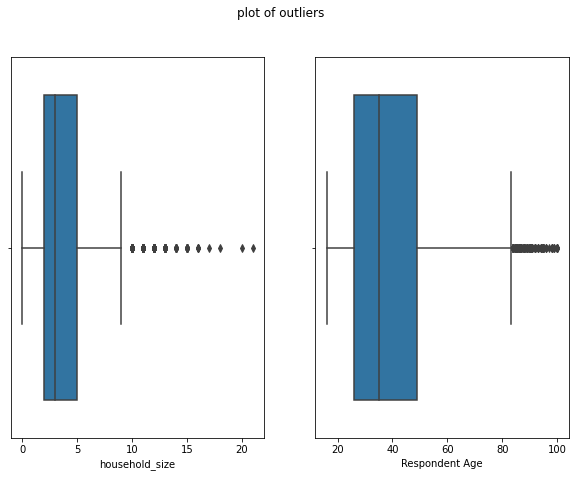

In [475]:
#checking for outliers
# we can see that we do have outliers in our dataset
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,7))
fig.suptitle('plot of outliers')
sns.boxplot(fino['household_size'],ax=ax1)
sns.boxplot(fino['Respondent Age'], ax=ax2)
plt.show()

# checking for anomalies

In [478]:
#removing the outliers in the two columns
q1 = fino.quantile(.25)
q3 = fino.quantile(.75)

iqr =q3 -q1
print(iqr)


year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


#removing outliers

In [480]:
fin= fino[~((fino < (q1 - 1.5 * iqr)) |(fino > (q3 + 1.5 * iqr))).any(axis=1)]
print(fin.shape)

(22725, 12)


In [399]:
#viewinf the  year column for anomalies
fin['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#remocing the anomalies from the year colums
anom = fin[fin['year']> 2018].index
fin.drop(anom,inplace=True)

#Exploratory Data Analysis

   ##   Univariate **analysis**

###Bar charts

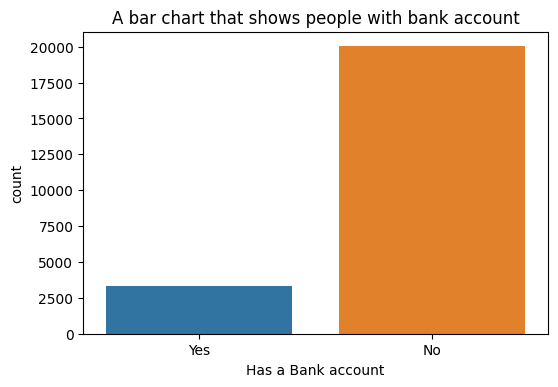

In [401]:
#plotting abar graph of participants with bank accounts vs those who dont
#majority of the individuals do not own bank accounts
plt.figure(dpi = 100)
sns.countplot(fin['Has a Bank account'])
plt.title("A bar chart that shows people with bank account")
plt.show()

### Histogram

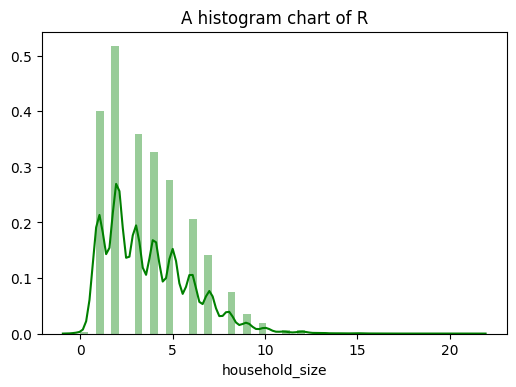

In [402]:
#a histogram showing the household size distribution
plt.figure(dpi = 100)
sns.distplot(fin['household_size'], color= 'green')
plt.title('A histogram chart of the house hold size')
plt.show()

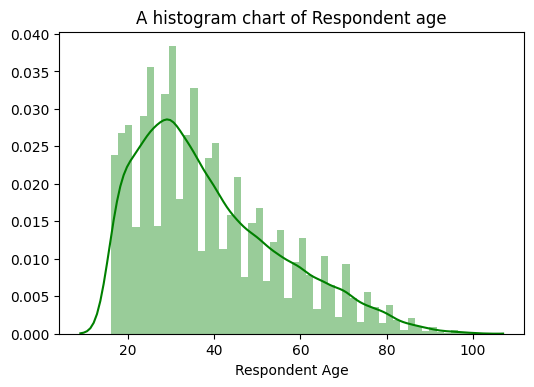

In [403]:
#a histogram showing the distribution of the Population age
plt.figure(dpi = 100)
sns.distplot(fin['Respondent Age'], color= 'green')
plt.title('A histogram chart of Respondent age')
plt.show()

###     Pie charts

country
Kenya       5868
Rwanda      8512
Tanzania    6424
Uganda      1921
Name: Has a Bank account, dtype: int64


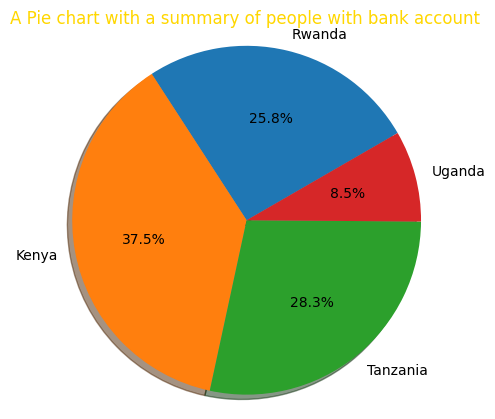

In [491]:
# A pie chart showing the distribution of individuals with bank accounts per country
#kenya has the majority of people with bank accounts
bank =fin.groupby(['country'])['Has a Bank account'].count()
print(bank)
label = ['Rwanda','Kenya','Tanzania','Uganda']
label

plt.figure(figsize=(5,5),dpi=100)
plt.pie(bank, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 30)
plt.axis('equal')
plt.title('A Pie chart with a summary of people with bank account', color='gold')
plt.show()

gender_of_respondent
Female    13397
Male       9328
Name: Has a Bank account, dtype: int64


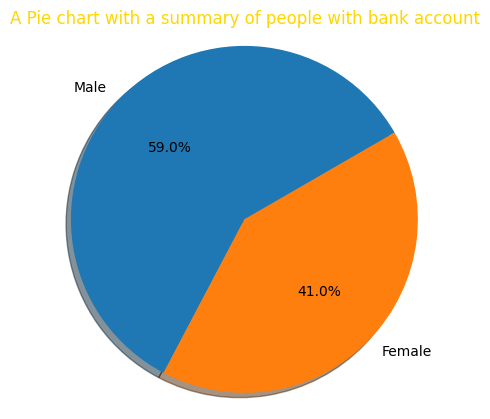

In [490]:
# A pie chart showing the distribution of individuals with bank accounts per Gender
bank =fin.groupby(['gender_of_respondent'])['Has a Bank account'].count()
print(bank)
label = ['Male','Female']
label

plt.figure(figsize=(5,5),dpi=100)
plt.pie(bank, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 30)
plt.axis('equal')
plt.title('A Pie chart with a summary of people with bank account', color='gold')
plt.show()

### Central Tendancy

In [406]:
#checking the mean for the numerical data that is year, household size and respondent age
print('house houlds mean',fin['household_size'].mean())
print('respomdent age mean',fin['Respondent Age'].mean())

house houlds mean 3.688560411311054
respomdent age mean 38.80706940874036


In [407]:
#checking the mode for the numerical data that is year, household size and respondent age
print('house houlds median',fin['household_size'].mode())
print('respomdent age median',fin['Respondent Age'].mode())

house houlds median 0    2.0
dtype: float64
respomdent age median 0    30.0
dtype: float64


In [408]:
#checking the mode for the numerical data that is year, household size and respondent age
print('house houlds median',fin['household_size'].median())
print('respomdent age median',fin['Respondent Age'].median())

house houlds median 3.0
respomdent age median 35.0


##Bivariate analysis

###Scatter plots

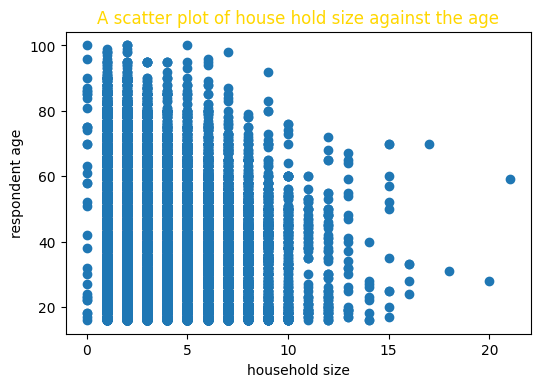

In [409]:
# we are going to plot a scatter plot so that we can see is their is a correlation between the householdsize and the respondent age
#this shows that their is no relationship between the respondent age and athe household size as we can not see any positive or negative trend
plt.figure(dpi= 100)
plt.scatter(fin['household_size'], fin['Respondent Age'])
plt.title('A scatter plot of house hold size against the age', color = 'gold')
plt.xlabel('household size')
plt.ylabel('respondent age')
plt.show()

### Line graph

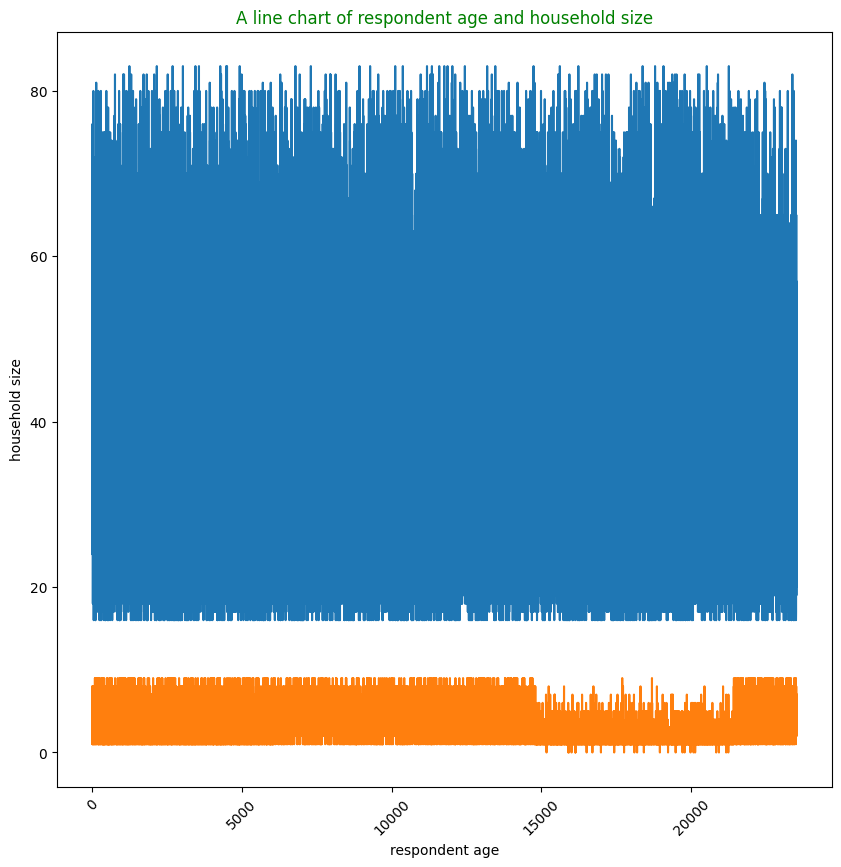

In [494]:
#their are too many variable to plot
plt.figure(figsize = (10,10), dpi = 100)
plt.plot(fin[['Respondent Age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'Green')
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

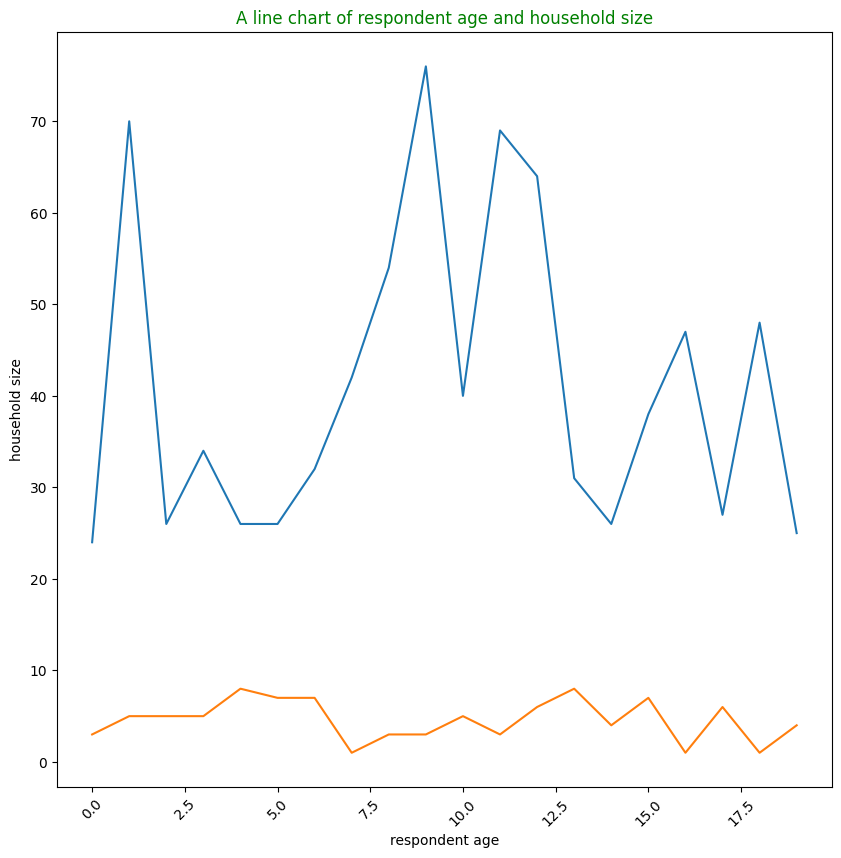

In [496]:
#we are going to limit the number of rows
find=fin.iloc[0:20,-7:-5]
plt.figure(figsize = (10,10), dpi = 100)
plt.plot(find[['Respondent Age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'Green')
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

###Heat map

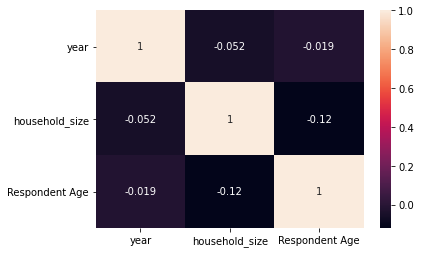

In [413]:
#this is a heat map showing the realationship between the year,householdsize and the respondent age
sns.heatmap(fin.corr(), annot=True)
plt.show()

# MULTIVARIATE

## Principal Component Analysis (PCA)

## mapping of the the categorical variables with numerical data

In [0]:

map_country ={
    "Kenya": 0,
    "Rwanda": 1,
    "Tanzania": 2,
    "Uganda": 3
}

fin['country']=fin['country'].map(map_country)

In [0]:
map_bank ={
    "Yes": 1,
    "No":0    
}
fin['Has a Bank account']=fin['Has a Bank account'].map(map_bank)

In [0]:
map_location ={
    "Rural": 1,
    "Urban":0
}
fin['Type of Location']=fin['Type of Location'].map(map_location)

In [0]:
map_phone ={
    "Yes": 1,
    "No":0
    
}
fin['Cell Phone Access']=fin['Cell Phone Access'].map(map_phone)

In [0]:
map_gender={
    'Female':1,
    'Male':0
}
fin['gender_of_respondent'] =fin['gender_of_respondent'].map(map_gender)

In [0]:
map_head={
    "Spouse":2,
    "Head of Household":1,
    "Other relative":0,
    "Child":3,
    "Parent":4,
    "Other non-relatives":5
}
fin['the_relationship_with_head']=fin['the_relationship_with_head'].map(map_head)

In [0]:
map_education={
    "No formal education":0,
    "Primary education":1,
    "Secondary education":2,
    "Vocational/Specialised training":3,
    "Tertiary education":4,
    "Other/Dont know/RTA":5,
    "6":6
}
fin['Level of Educuation']=fin['Level of Educuation'].map(map_education)

In [0]:
map_job={
    "Self employed":0,
    "Government Dependent":1,
    "Formally employed Private":2,
    "Informally employed":3,
    "Formally employed Government":4,
    "Farming and Fishing":5,
    "Remittance Dependent":6,
    "Other Income":7,
    "Dont Know/Refuse to answer":8,
    "No Income":9
}
fin['Type of Job']=fin['Type of Job'].map(map_job)

In [426]:
#checking our data to see if the mapping worked
fin.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,the_relationship_with_head,marital_status,Level of Educuation,Type of Job
0,0,2018,1,1,1,3.0,24.0,1,2,Married/Living together,2,0
1,0,2018,0,1,0,5.0,70.0,1,1,Widowed,0,1
2,0,2018,1,0,1,5.0,26.0,0,0,Single/Never Married,3,0
3,0,2018,0,1,1,5.0,34.0,1,1,Married/Living together,1,2
4,0,2018,0,0,0,8.0,26.0,0,3,Single/Never Married,1,3


In [0]:
#preprocessing step
#we are diving the data into the labels which is the y- axis and the features as the x-axis
X = fin.drop(columns = ['year','Has a Bank account','marital_status'])
y = fin['Has a Bank account']

In [0]:
#we are going to split the data into a training and and a test data using the train_test_split 
#we are importing train_test_split from the skleanmodel
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [0]:
#we are going to perform a normalization of our data
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#we are going to apply PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [431]:
#explained variance ratio obtained from PCA
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.19292666, 0.17180353, 0.15206453, 0.10648086, 0.09282925,
       0.08700206, 0.0705692 , 0.06763366, 0.05869024])

In [0]:
#we are going to use 3 principal componrnts to train our algorithm
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
#we are training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)

In [434]:
#we are going to have a performance evaluation
#we are going to use a confusin matrix for this
#we are getting a 86% accuracy from 4038 instances
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


## Linear Discriminant Analysis

In [0]:
#we are going to divid our data into two again
X_l = fin.drop(columns = ['year','Has a Bank account','marital_status'])
y_l = fin['Has a Bank account']

In [0]:
# wea re going to divide the data into training and and test sets
from sklearn.model_selection import train_test_split
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size=0.2, random_state=0)

In [0]:
#normalizing our data using the standard scaler
#this is a feature scaling method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_l_train = sc.fit_transform(X_l_train)
X_l_test = sc.transform(X_l_test)

In [0]:
#performing Linear Discrimin antAnalysis
#we are going to use only one component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_l_train = lda.fit_transform(X_l_train, y_l_train)
X_l_test = lda.transform(X_l_test)


In [0]:
#training and making predictions
#we are going to use the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_l_train, y_l_train)
y_l_pred = classifier.predict(X_l_test)

In [280]:
#perfoming an evaluation using a confusion matrix
#we are getting 85% accuaracy.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_l_test, y_l_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_l_test, y_l_pred)))

[[4008    0]
 [ 661    0]]
Accuracy0.8584279288926965


## Factor Analysis

In [435]:
fin.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,the_relationship_with_head,marital_status,Level of Educuation,Type of Job
0,0,2018,1,1,1,3.0,24.0,1,2,Married/Living together,2,0
1,0,2018,0,1,0,5.0,70.0,1,1,Widowed,0,1
2,0,2018,1,0,1,5.0,26.0,0,0,Single/Never Married,3,0
3,0,2018,0,1,1,5.0,34.0,1,1,Married/Living together,1,2
4,0,2018,0,0,0,8.0,26.0,0,3,Single/Never Married,1,3


In [0]:
#dropping unnecessy columns
fin.drop(['year','marital_status'], axis=1, inplace=True)

In [439]:
#checking if the columns were sropped
fin.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,the_relationship_with_head,Level of Educuation,Type of Job
0,0,1,1,1,3.0,24.0,1,2,2,0
1,0,0,1,0,5.0,70.0,1,1,0,1
2,0,1,0,1,5.0,26.0,0,0,3,0
3,0,0,1,1,5.0,34.0,1,1,1,2
4,0,0,0,0,8.0,26.0,0,3,1,3


In [444]:
#installing factor analyzer
pip install factor_analyzer==0.2.3

In [445]:
#chi_scure
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(fin)
chi_square_value,p_value
# the test was significant becouse the p-value is 0 which tells us that the correlation matrix is not an identy matrix

(22791.515653782466, 0.0)

In [452]:
#choosing the number of factors
#here we can only see 3-factor analyzer are greater than 1 which means we only need to consider the three factors
from factor_analyzer import  FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(fin, 10, rotation=None)

ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.755857
1,1.683905
2,1.514333
3,1.011960
4,0.838998
5,0.783457
6,0.732367
7,0.635477
8,0.547161
9,0.496486


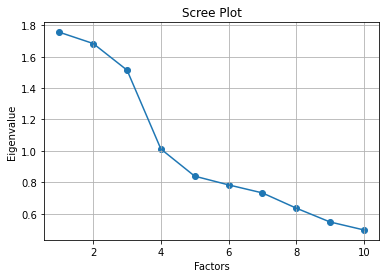

In [458]:
#the scree plot that drows a straight line for easch factor and its eigen values.

plt.scatter(range(1,fin.shape[1]+1),ev)
plt.plot(range(1,fin.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [454]:
#performing Factor Analysis
fa = FactorAnalyzer()
fa.analyze(fin,3, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3
country,0.101339,-0.231109,-0.392560
Has a Bank account,-0.055418,0.554092,-0.032684
Type of Location,-0.070397,-0.075770,0.543031
Cell Phone Access,0.032328,0.396748,0.153986
household_size,0.190413,0.000702,0.472003
Respondent Age,-0.579860,-0.132102,0.019497
gender_of_respondent,0.157716,-0.239137,0.045863
the_relationship_with_head,0.721531,-0.162593,0.128075
Level of Educuation,0.330572,0.646842,-0.129013
Type of Job,0.071250,-0.034406,0.419486


In [463]:
#performing factor analysis
fa = FactorAnalyzer()
fa.analyze(fin, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
country,-0.091700,-0.233562
Has a Bank account,0.414089,-0.109969
Type of Location,-0.145585,0.415509
Cell Phone Access,0.316043,0.103389
household_size,0.021447,0.544605
Respondent Age,-0.322060,-0.228825
gender_of_respondent,-0.136992,0.136529
the_relationship_with_head,0.118828,0.354135
Level of Educuation,0.840566,-0.020630
Type of Job,-0.041616,0.406294


In [464]:
# Getting variance of each factors
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.146309,0.908489
Proportion Var,0.114631,0.090849
Cumulative Var,0.114631,0.205480
